In [10]:
import numpy as np
from scipy.optimize import minimize

# Define constants
Z = 1.65  # Z-score for a 90% service level

# Example data for transport cost and distances
transport_cost_per_unit = 2
warehouse_distances = [10, 20, 15, 25, 12, 22, 18, 28]  # Example distances

# Utility functions
def calculate_eoq(demand, ordering_cost, holding_cost):
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_rop(daily_demand, lead_time, safety_stock):
    return (daily_demand * lead_time) + safety_stock

def calculate_safety_stock(daily_demand_std, lead_time, lead_time_std):
    return Z * np.sqrt((lead_time * daily_demand_std**2) + (daily_demand_std**2 * lead_time_std**2))

def calculate_total_cost(demand, ordering_cost, holding_cost, transport_cost, eoq):
    order_cost = (demand / eoq) * ordering_cost
    holding_cost_total = (eoq / 2) * holding_cost
    return order_cost + holding_cost_total + transport_cost

def total_logistics_cost(x, products, transport_cost_per_unit, warehouse_distances):
    total_cost = 0
    for i, product in enumerate(products):
        pooled_demand = x[i]  # Ensure x[i] is within bounds
        if i < len(warehouse_distances):
            transport_cost = transport_cost_per_unit * warehouse_distances[i] * pooled_demand
            total_cost += transport_cost
    return total_cost

def optimize_pooling(products, transport_cost_per_unit, warehouse_distances):
    num_products = len(products)
    x0 = np.zeros(num_products)  # Start with an array of zeros
    
    # Ensure bounds match the number of products
    bounds = [(0, 1) for _ in range(num_products)]  # Adjust bounds as needed

    # Use method 'L-BFGS-B' for bounded optimization
    result = minimize(total_logistics_cost, x0, args=(products, transport_cost_per_unit, warehouse_distances), bounds=bounds, method='L-BFGS-B')
    return result.x



# Define a list of products with example details
products = [
    # Electronics
    {'name': 'Samsung Galaxy S21', 'demand': 1000, 'cost': 69999, 'price': 69999, 'holding_cost_rate': 0.1, 'ordering_cost': 200, 'daily_demand_std': 50, 'lead_time': 10, 'lead_time_std': 2},
    {'name': 'iPhone 12', 'demand': 1500, 'cost': 64900, 'price': 64900, 'holding_cost_rate': 0.1, 'ordering_cost': 180, 'daily_demand_std': 40, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'Vivo V21', 'demand': 800, 'cost': 28999, 'price': 28999, 'holding_cost_rate': 0.1, 'ordering_cost': 150, 'daily_demand_std': 30, 'lead_time': 8, 'lead_time_std': 1.5},
    {'name': 'OnePlus 9', 'demand': 600, 'cost': 49999, 'price': 49999, 'holding_cost_rate': 0.1, 'ordering_cost': 220, 'daily_demand_std': 25, 'lead_time': 9, 'lead_time_std': 2},

    {'name': 'Dell XPS 13', 'demand': 500, 'cost': 129999, 'price': 129999, 'holding_cost_rate': 0.1, 'ordering_cost': 300, 'daily_demand_std': 20, 'lead_time': 15, 'lead_time_std': 4},
    {'name': 'MacBook Air', 'demand': 700, 'cost': 92990, 'price': 92990, 'holding_cost_rate': 0.1, 'ordering_cost': 250, 'daily_demand_std': 25, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'HP Spectre x360', 'demand': 400, 'cost': 114999, 'price': 114999, 'holding_cost_rate': 0.1, 'ordering_cost': 270, 'daily_demand_std': 15, 'lead_time': 14, 'lead_time_std': 3.5},
    {'name': 'Lenovo ThinkPad X1', 'demand': 300, 'cost': 139990, 'price': 139990, 'holding_cost_rate': 0.1, 'ordering_cost': 320, 'daily_demand_std': 18, 'lead_time': 16, 'lead_time_std': 4},

    {'name': 'Canon EOS R5', 'demand': 200, 'cost': 289990, 'price': 289990, 'holding_cost_rate': 0.1, 'ordering_cost': 500, 'daily_demand_std': 10, 'lead_time': 20, 'lead_time_std': 5},
    {'name': 'Nikon Z6', 'demand': 150, 'cost': 189990, 'price': 189990, 'holding_cost_rate': 0.1, 'ordering_cost': 450, 'daily_demand_std': 12, 'lead_time': 18, 'lead_time_std': 4.5},
    {'name': 'Sony Alpha a7 III', 'demand': 180, 'cost': 199990, 'price': 199990, 'holding_cost_rate': 0.1, 'ordering_cost': 480, 'daily_demand_std': 14, 'lead_time': 22, 'lead_time_std': 5},
    {'name': 'Fujifilm X-T4', 'demand': 220, 'cost': 169990, 'price': 169990, 'holding_cost_rate': 0.1, 'ordering_cost': 470, 'daily_demand_std': 13, 'lead_time': 21, 'lead_time_std': 4.8},

    # Clothing and Apparel
    {'name': 'Levi\'s Jeans', 'demand': 1000, 'cost': 2999, 'price': 2999, 'holding_cost_rate': 0.1, 'ordering_cost': 50, 'daily_demand_std': 60, 'lead_time': 7, 'lead_time_std': 1},
    {'name': 'Nike T-shirt', 'demand': 1200, 'cost': 1799, 'price': 1799, 'holding_cost_rate': 0.1, 'ordering_cost': 45, 'daily_demand_std': 70, 'lead_time': 6, 'lead_time_std': 1.2},
    {'name': 'Adidas Jacket', 'demand': 800, 'cost': 3499, 'price': 3499, 'holding_cost_rate': 0.1, 'ordering_cost': 60, 'daily_demand_std': 50, 'lead_time': 8, 'lead_time_std': 1.5},
    {'name': 'Puma Shorts', 'demand': 1500, 'cost': 1299, 'price': 1299, 'holding_cost_rate': 0.1, 'ordering_cost': 40, 'daily_demand_std': 80, 'lead_time': 5, 'lead_time_std': 1},

    {'name': 'Zara Dress', 'demand': 700, 'cost': 4999, 'price': 4999, 'holding_cost_rate': 0.1, 'ordering_cost': 55, 'daily_demand_std': 40, 'lead_time': 9, 'lead_time_std': 2},
    {'name': 'H&M Blouse', 'demand': 800, 'cost': 1999, 'price': 1999, 'holding_cost_rate': 0.1, 'ordering_cost': 45, 'daily_demand_std': 50, 'lead_time': 8, 'lead_time_std': 1.8},
    {'name': 'Forever 21 Skirt', 'demand': 600, 'cost': 2499, 'price': 2499, 'holding_cost_rate': 0.1, 'ordering_cost': 50, 'daily_demand_std': 30, 'lead_time': 7, 'lead_time_std': 1.5},
    {'name': 'Uniqlo Sweater', 'demand': 900, 'cost': 2999, 'price': 2999, 'holding_cost_rate': 0.1, 'ordering_cost': 55, 'daily_demand_std': 60, 'lead_time': 10, 'lead_time_std': 2.2},
]


# Optimize pooling and calculate costs
optimal_pools = optimize_pooling(products, transport_cost_per_unit, warehouse_distances)

# Output results for each product
for i, product in enumerate(products):
    demand = product['demand']
    holding_cost = product['holding_cost_rate'] * product['cost']
    eoq = calculate_eoq(demand, product['ordering_cost'], holding_cost)
    daily_demand = demand / 365
    safety_stock = calculate_safety_stock(product['daily_demand_std'], product['lead_time'], product['lead_time_std'])
    rop = calculate_rop(daily_demand, product['lead_time'], safety_stock)
    ail = eoq / 2 + safety_stock
    transport_cost = transport_cost_per_unit * warehouse_distances[i] * demand
    total_cost = calculate_total_cost(demand, product['ordering_cost'], holding_cost, transport_cost, eoq)

    print(f"Product: {product['name']}")
    print(f"  Optimal Pool: {int(optimal_pools[i])}")
    print(f"  EOQ: {eoq:.2f}")
    print(f"  ROP: {rop:.2f}")
    print(f"  Safety Stock: {safety_stock:.2f}")
    print(f"  AIL: {ail:.2f}")
    print(f"  Total Cost: {total_cost:.2f}")
    print(f"  Transport Cost: {transport_cost:.2f}")
    print()


Product: Samsung Galaxy S21
  Optimal Pool: 0
  EOQ: 7.56
  ROP: 336.08
  Safety Stock: 308.69
  AIL: 312.47
  Total Cost: 72914.65
  Transport Cost: 20000.00

Product: iPhone 12
  Optimal Pool: 0
  EOQ: 9.12
  ROP: 351.77
  Safety Stock: 302.45
  AIL: 307.01
  Total Cost: 119199.66
  Transport Cost: 60000.00

Product: Vivo V21
  Optimal Pool: 0
  EOQ: 9.10
  ROP: 176.01
  Safety Stock: 158.48
  AIL: 163.03
  Total Cost: 50381.36
  Transport Cost: 24000.00

Product: OnePlus 9
  Optimal Pool: 0
  EOQ: 7.27
  ROP: 163.52
  Safety Stock: 148.73
  AIL: 152.36
  Total Cost: 66331.44
  Transport Cost: 30000.00

Product: Dell XPS 13
  Optimal Pool: 0
  EOQ: 4.80
  ROP: 204.28
  Safety Stock: 183.74
  AIL: 186.14
  Total Cost: 74449.74
  Transport Cost: 12000.00

Product: MacBook Air
  Optimal Pool: 0
  EOQ: 6.14
  ROP: 212.04
  Safety Stock: 189.03
  AIL: 192.10
  Total Cost: 87849.54
  Transport Cost: 30800.00

Product: HP Spectre x360
  Optimal Pool: 0
  EOQ: 4.33
  ROP: 142.15
  Safety Sto

IndexError: list index out of range

In [15]:
import numpy as np
from scipy.optimize import minimize

# Define constants
Z = 1.65  # Z-score for a 90% service level

# Example data for transport cost and distances
transport_cost_per_unit = 2
warehouse_distances = [10, 20, 15, 25, 12, 22, 18, 28, 30,12,15,30,20,13,14,23,24,34,30,40]  # Example distances

# Utility functions
def calculate_eoq(demand, ordering_cost, holding_cost):
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_rop(daily_demand, lead_time, safety_stock):
    return (daily_demand * lead_time) + safety_stock

def calculate_safety_stock(daily_demand_std, lead_time, lead_time_std):
    return Z * np.sqrt((lead_time * daily_demand_std**2) + (daily_demand_std**2 * lead_time_std**2))

def calculate_total_cost(demand, ordering_cost, holding_cost, transport_cost, eoq):
    order_cost = (demand / eoq) * ordering_cost
    holding_cost_total = (eoq / 2) * holding_cost
    return order_cost + holding_cost_total + transport_cost

def total_logistics_cost(x, products, transport_cost_per_unit, warehouse_distances):
    total_cost = 0
    num_products = len(products)
    for i in range(num_products):
        pooled_demand = x[i]  # Ensure x[i] is within bounds
        if i < len(warehouse_distances):
            transport_cost = transport_cost_per_unit * warehouse_distances[i] * pooled_demand
        else:
            transport_cost = transport_cost_per_unit * warehouse_distances[-1] * pooled_demand  # Use last distance as fallback
        total_cost += transport_cost
    return total_cost

def optimize_pooling(products, transport_cost_per_unit, warehouse_distances):
    num_products = len(products)
    x0 = np.zeros(num_products)  # Start with an array of zeros
    
    # Ensure bounds match the number of products
    bounds = [(0, 1) for _ in range(num_products)]  # Adjust bounds as needed

    # Use method 'L-BFGS-B' for bounded optimization
    result = minimize(total_logistics_cost, x0, args=(products, transport_cost_per_unit, warehouse_distances), bounds=bounds, method='L-BFGS-B')
    return result.x

# Define a list of products with example details
products = [
    {'name': 'Samsung Galaxy S21', 'demand': 1000, 'cost': 69999, 'price': 69999, 'holding_cost_rate': 0.1, 'ordering_cost': 200, 'daily_demand_std': 50, 'lead_time': 10, 'lead_time_std': 2},
    {'name': 'iPhone 12', 'demand': 1500, 'cost': 64900, 'price': 64900, 'holding_cost_rate': 0.1, 'ordering_cost': 180, 'daily_demand_std': 40, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'Vivo V21', 'demand': 800, 'cost': 28999, 'price': 28999, 'holding_cost_rate': 0.1, 'ordering_cost': 150, 'daily_demand_std': 30, 'lead_time': 8, 'lead_time_std': 1.5},
    {'name': 'OnePlus 9', 'demand': 600, 'cost': 49999, 'price': 49999, 'holding_cost_rate': 0.1, 'ordering_cost': 220, 'daily_demand_std': 25, 'lead_time': 9, 'lead_time_std': 2},
    {'name': 'Dell XPS 13', 'demand': 500, 'cost': 129999, 'price': 129999, 'holding_cost_rate': 0.1, 'ordering_cost': 300, 'daily_demand_std': 20, 'lead_time': 15, 'lead_time_std': 4},
    {'name': 'MacBook Air', 'demand': 700, 'cost': 92990, 'price': 92990, 'holding_cost_rate': 0.1, 'ordering_cost': 250, 'daily_demand_std': 25, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'HP Spectre x360', 'demand': 400, 'cost': 114999, 'price': 114999, 'holding_cost_rate': 0.1, 'ordering_cost': 270, 'daily_demand_std': 15, 'lead_time': 14, 'lead_time_std': 3.5},
    {'name': 'Lenovo ThinkPad X1', 'demand': 300, 'cost': 139990, 'price': 139990, 'holding_cost_rate': 0.1, 'ordering_cost': 320, 'daily_demand_std': 18, 'lead_time': 16, 'lead_time_std': 4},
    {'name': 'Canon EOS R5', 'demand': 200, 'cost': 289990, 'price': 289990, 'holding_cost_rate': 0.1, 'ordering_cost': 500, 'daily_demand_std': 10, 'lead_time': 20, 'lead_time_std': 5},
    {'name': 'Nikon Z6', 'demand': 150, 'cost': 189990, 'price': 189990, 'holding_cost_rate': 0.1, 'ordering_cost': 450, 'daily_demand_std': 12, 'lead_time': 18, 'lead_time_std': 4.5},
    {'name': 'Sony Alpha a7 III', 'demand': 180, 'cost': 199990, 'price': 199990, 'holding_cost_rate': 0.1, 'ordering_cost': 480, 'daily_demand_std': 14, 'lead_time': 22, 'lead_time_std': 5},
    {'name': 'Fujifilm X-T4', 'demand': 220, 'cost': 169990, 'price': 169990, 'holding_cost_rate': 0.1, 'ordering_cost': 470, 'daily_demand_std': 13, 'lead_time': 21, 'lead_time_std': 4.8},
    {'name': 'Levi\'s Jeans', 'demand': 1000, 'cost': 2999, 'price': 2999, 'holding_cost_rate': 0.1, 'ordering_cost': 50, 'daily_demand_std': 60, 'lead_time': 7, 'lead_time_std': 1},
    {'name': 'Nike T-shirt', 'demand': 1200, 'cost': 1799, 'price': 1799, 'holding_cost_rate': 0.1, 'ordering_cost': 45, 'daily_demand_std': 70, 'lead_time': 6, 'lead_time_std': 1.2},
    {'name': 'Adidas Jacket', 'demand': 800, 'cost': 3499, 'price': 3499, 'holding_cost_rate': 0.1, 'ordering_cost': 60, 'daily_demand_std': 50, 'lead_time': 8, 'lead_time_std': 1.5},
    {'name': 'Puma Shorts', 'demand': 1500, 'cost': 1299, 'price': 1299, 'holding_cost_rate': 0.1, 'ordering_cost': 40, 'daily_demand_std': 80, 'lead_time': 5, 'lead_time_std': 1},
    {'name': 'Zara Dress', 'demand': 700, 'cost': 4999, 'price': 4999, 'holding_cost_rate': 0.1, 'ordering_cost': 55, 'daily_demand_std': 40, 'lead_time': 9, 'lead_time_std': 2},
    {'name': 'H&M Blouse', 'demand': 800, 'cost': 1999, 'price': 1999, 'holding_cost_rate': 0.1, 'ordering_cost': 45, 'daily_demand_std': 50, 'lead_time': 8, 'lead_time_std': 1.8},
    {'name': 'Forever 21 Skirt', 'demand': 600, 'cost': 2499, 'price': 2499, 'holding_cost_rate': 0.1, 'ordering_cost': 50, 'daily_demand_std': 30, 'lead_time': 7, 'lead_time_std': 1.5},
    {'name': 'Mango Coat', 'demand': 500, 'cost': 5999, 'price': 5999, 'holding_cost_rate': 0.1, 'ordering_cost': 65, 'daily_demand_std': 25, 'lead_time': 10, 'lead_time_std': 2.2},
]

# Calculate the optimal pooling
optimal_pools = optimize_pooling(products, transport_cost_per_unit, warehouse_distances)

# Output results for each product
for i, product in enumerate(products):
    demand = product['demand']
    holding_cost = product['holding_cost_rate'] * product['cost']
    eoq = calculate_eoq(demand, product['ordering_cost'], holding_cost)
    daily_demand = demand / 365
    safety_stock = calculate_safety_stock(product['daily_demand_std'], product['lead_time'], product['lead_time_std'])
    rop = calculate_rop(daily_demand, product['lead_time'], safety_stock)
    ail = eoq / 2 + safety_stock
    transport_cost = transport_cost_per_unit * warehouse_distances[i] * demand
    total_cost = calculate_total_cost(demand, product['ordering_cost'], holding_cost, transport_cost, eoq)

    print(f"Product: {product['name']}")
    print(f"  Optimal Pool: {int(optimal_pools[i])}")
    print(f"  EOQ: {eoq:.2f}")
    print(f"  ROP: {rop:.2f}")
    print(f"  Safety Stock: {safety_stock:.2f}")
    print(f"  AIL: {ail:.2f}")
    print(f"  Total Cost: {total_cost:.2f}")
    print(f"  Transport Cost: {transport_cost:.2f}")
    print()


Product: Samsung Galaxy S21
  Optimal Pool: 0
  EOQ: 7.56
  ROP: 336.08
  Safety Stock: 308.69
  AIL: 312.47
  Total Cost: 72914.65
  Transport Cost: 20000.00

Product: iPhone 12
  Optimal Pool: 0
  EOQ: 9.12
  ROP: 351.77
  Safety Stock: 302.45
  AIL: 307.01
  Total Cost: 119199.66
  Transport Cost: 60000.00

Product: Vivo V21
  Optimal Pool: 0
  EOQ: 9.10
  ROP: 176.01
  Safety Stock: 158.48
  AIL: 163.03
  Total Cost: 50381.36
  Transport Cost: 24000.00

Product: OnePlus 9
  Optimal Pool: 0
  EOQ: 7.27
  ROP: 163.52
  Safety Stock: 148.73
  AIL: 152.36
  Total Cost: 66331.44
  Transport Cost: 30000.00

Product: Dell XPS 13
  Optimal Pool: 0
  EOQ: 4.80
  ROP: 204.28
  Safety Stock: 183.74
  AIL: 186.14
  Total Cost: 74449.74
  Transport Cost: 12000.00

Product: MacBook Air
  Optimal Pool: 0
  EOQ: 6.14
  ROP: 212.04
  Safety Stock: 189.03
  AIL: 192.10
  Total Cost: 87849.54
  Transport Cost: 30800.00

Product: HP Spectre x360
  Optimal Pool: 0
  EOQ: 4.33
  ROP: 142.15
  Safety Sto

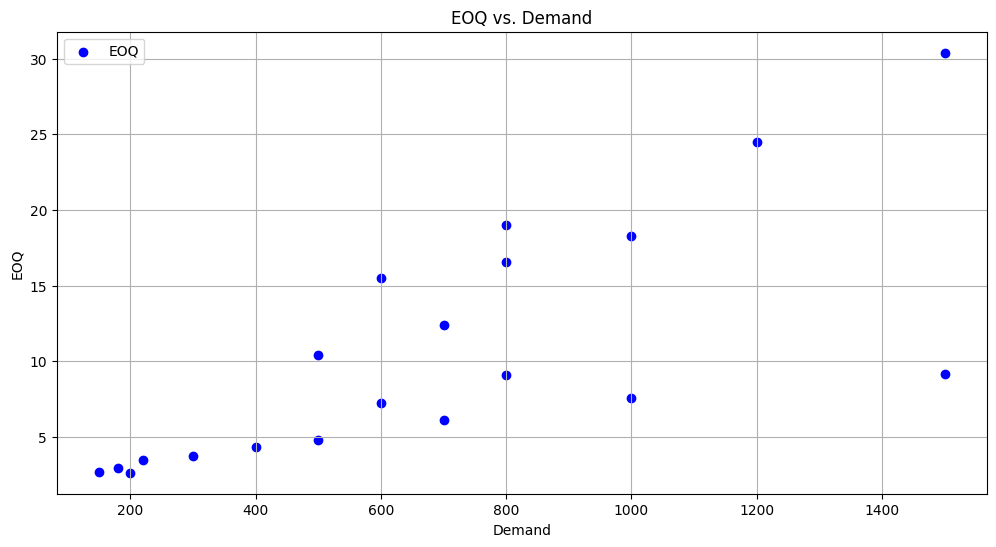

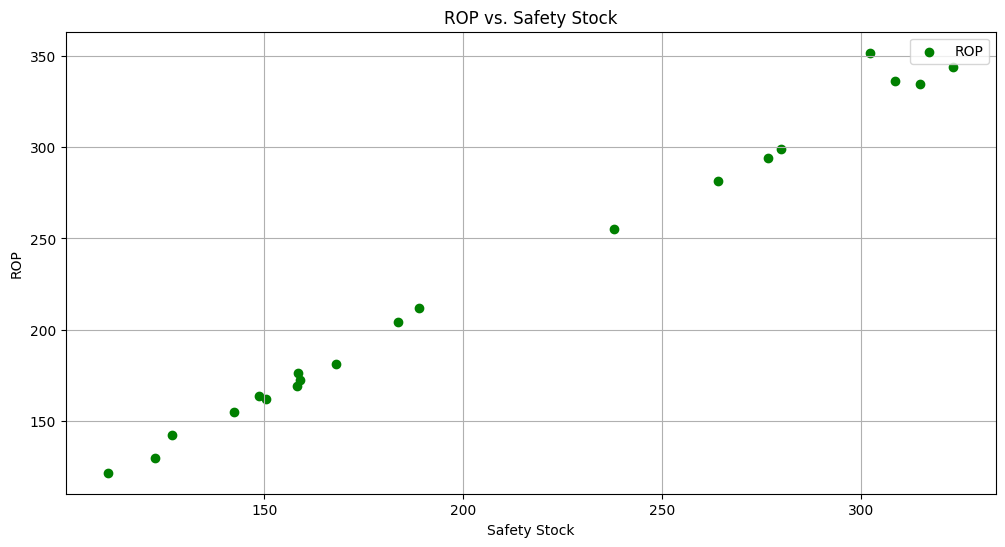

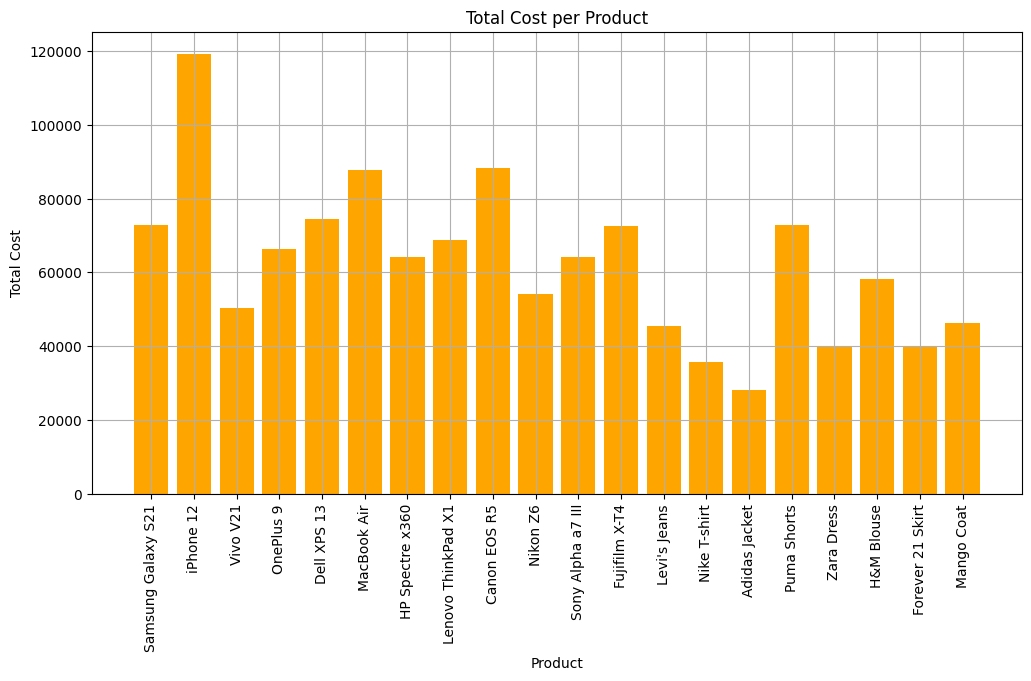

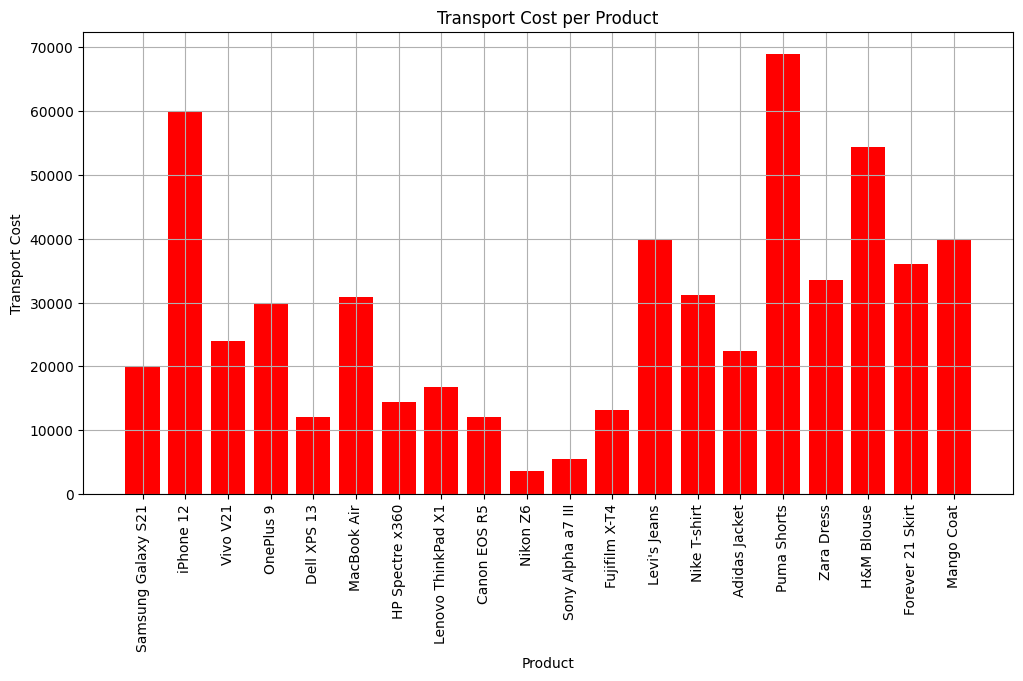

In [16]:
import matplotlib.pyplot as plt

# Prepare data for plotting
products_names = [product['name'] for product in products]
eoq_values = []
rop_values = []
safety_stock_values = []
total_cost_values = []
transport_cost_values = []

for i, product in enumerate(products):
    demand = product['demand']
    holding_cost = product['holding_cost_rate'] * product['cost']
    eoq = calculate_eoq(demand, product['ordering_cost'], holding_cost)
    daily_demand = demand / 365
    safety_stock = calculate_safety_stock(product['daily_demand_std'], product['lead_time'], product['lead_time_std'])
    rop = calculate_rop(daily_demand, product['lead_time'], safety_stock)
    ail = eoq / 2 + safety_stock
    transport_cost = transport_cost_per_unit * warehouse_distances[i] * demand
    total_cost = calculate_total_cost(demand, product['ordering_cost'], holding_cost, transport_cost, eoq)
    
    eoq_values.append(eoq)
    rop_values.append(rop)
    safety_stock_values.append(safety_stock)
    total_cost_values.append(total_cost)
    transport_cost_values.append(transport_cost)

# Plot EOQ vs. Demand
plt.figure(figsize=(12, 6))
plt.scatter([product['demand'] for product in products], eoq_values, color='blue', label='EOQ')
plt.xlabel('Demand')
plt.ylabel('EOQ')
plt.title('EOQ vs. Demand')
plt.legend()
plt.grid(True)
plt.show()

# Plot ROP vs. Safety Stock
plt.figure(figsize=(12, 6))
plt.scatter(safety_stock_values, rop_values, color='green', label='ROP')
plt.xlabel('Safety Stock')
plt.ylabel('ROP')
plt.title('ROP vs. Safety Stock')
plt.legend()
plt.grid(True)
plt.show()

# Plot Total Cost vs. Product
plt.figure(figsize=(12, 6))
plt.bar(products_names, total_cost_values, color='orange')
plt.xlabel('Product')
plt.ylabel('Total Cost')
plt.title('Total Cost per Product')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot Transport Cost vs. Product
plt.figure(figsize=(12, 6))
plt.bar(products_names, transport_cost_values, color='red')
plt.xlabel('Product')
plt.ylabel('Transport Cost')
plt.title('Transport Cost per Product')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Optimal Distribution:
  Warehouse 1 to Store 1: 1000.00
  Warehouse 1 to Store 2: 0.00
  Warehouse 1 to Store 3: 0.00
  Warehouse 1 to Store 4: 0.00
  Warehouse 2 to Store 1: 0.00
  Warehouse 2 to Store 2: 1200.00
  Warehouse 2 to Store 3: 0.00
  Warehouse 2 to Store 4: 0.00
  Warehouse 3 to Store 1: 0.00
  Warehouse 3 to Store 2: 0.00
  Warehouse 3 to Store 3: 800.00
  Warehouse 3 to Store 4: 1500.00
Total Cost: 9800.00


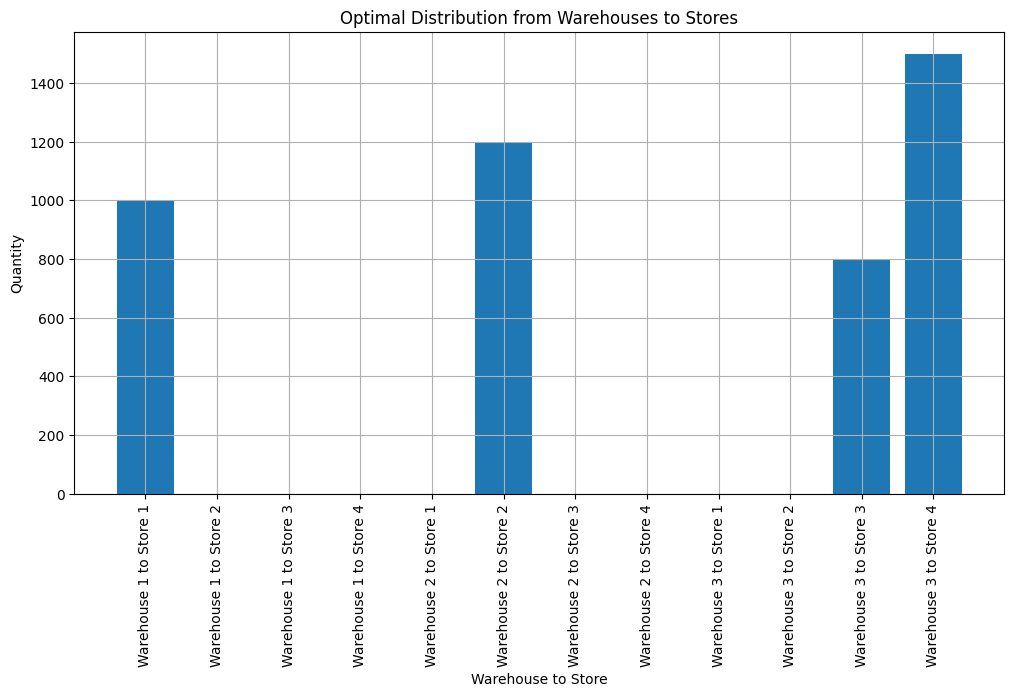

In [17]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Example data for warehouses and stores
warehouses = ['Warehouse 1', 'Warehouse 2', 'Warehouse 3']
stores = ['Store 1', 'Store 2', 'Store 3', 'Store 4']
warehouse_capacities = [5000, 4000, 3000]  # Capacity of each warehouse
store_demands = [1000, 1200, 800, 1500]    # Demand of each store

# Cost matrix (transport cost from each warehouse to each store)
# Rows represent warehouses, columns represent stores
transport_costs = np.array([
    [2, 3, 4, 5],   # Costs from Warehouse 1 to each store
    [3, 2, 5, 4],   # Costs from Warehouse 2 to each store
    [4, 5, 3, 2]    # Costs from Warehouse 3 to each store
])

# Flatten the transport costs matrix for optimization
c = transport_costs.flatten()  # Objective function coefficients

# Constraints
# 1. Each warehouse has a capacity constraint
A_ub = []
b_ub = []
for i, capacity in enumerate(warehouse_capacities):
    constraint = np.zeros_like(c)
    for j in range(len(stores)):
        constraint[i * len(stores) + j] = 1
    A_ub.append(constraint)
    b_ub.append(capacity)

# 2. Each store has a demand constraint
A_eq = []
b_eq = []
for j in range(len(stores)):
    constraint = np.zeros_like(c)
    for i in range(len(warehouses)):
        constraint[i * len(stores) + j] = 1
    A_eq.append(constraint)
    b_eq.append(store_demands[j])

# Convert lists to numpy arrays
A_ub = np.array(A_ub)
b_ub = np.array(b_ub)
A_eq = np.array(A_eq)
b_eq = np.array(b_eq)

# Bounds for each variable (number of units to transport should be non-negative)
x_bounds = [(0, None) for _ in range(len(c))]

# Solve the linear programming problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Extract the results
if result.success:
    distribution = result.x.reshape(len(warehouses), len(stores))
    print("Optimal Distribution:")
    for i, warehouse in enumerate(warehouses):
        for j, store in enumerate(stores):
            print(f"  {warehouse} to {store}: {distribution[i, j]:.2f}")
    
    # Calculate total cost
    total_cost = result.fun
    print(f"Total Cost: {total_cost:.2f}")

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar([f"{w} to {s}" for w in warehouses for s in stores], distribution.flatten())
    plt.xlabel('Warehouse to Store')
    plt.ylabel('Quantity')
    plt.title('Optimal Distribution from Warehouses to Stores')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

else:
    print("Optimization failed:", result.message)


Product: Samsung Galaxy S21
  Optimal Pool: 1000.00
  EOQ: 7.56
  ROP: 336.08
  Safety Stock: 308.69
  AIL: 312.47
  Total Cost: 54914.65
  Transport Cost: 2000.00

Product: iPhone 12
  Optimal Pool: 1200.00
  EOQ: 9.12
  ROP: 351.77
  Safety Stock: 302.45
  AIL: 307.01
  Total Cost: 61599.66
  Transport Cost: 2400.00

Product: Vivo V21
  Optimal Pool: 800.00
  EOQ: 9.10
  ROP: 176.01
  Safety Stock: 158.48
  AIL: 163.03
  Total Cost: 31781.36
  Transport Cost: 5400.00

Product: OnePlus 9
  Optimal Pool: 0.00
  EOQ: 7.27
  ROP: 163.52
  Safety Stock: 148.73
  AIL: 152.36
  Total Cost: 38331.44
  Transport Cost: 2000.00

Product: Dell XPS 13
  Optimal Pool: 0.00
  EOQ: 4.80
  ROP: 204.28
  Safety Stock: 183.74
  AIL: 186.14
  Total Cost: 64849.74
  Transport Cost: 2400.00

Product: MacBook Air
  Optimal Pool: 0.00
  EOQ: 6.14
  ROP: 212.04
  Safety Stock: 189.03
  AIL: 192.10
  Total Cost: 62449.54
  Transport Cost: 5400.00

Product: HP Spectre x360
  Optimal Pool: 0.00
  EOQ: 4.33
  RO

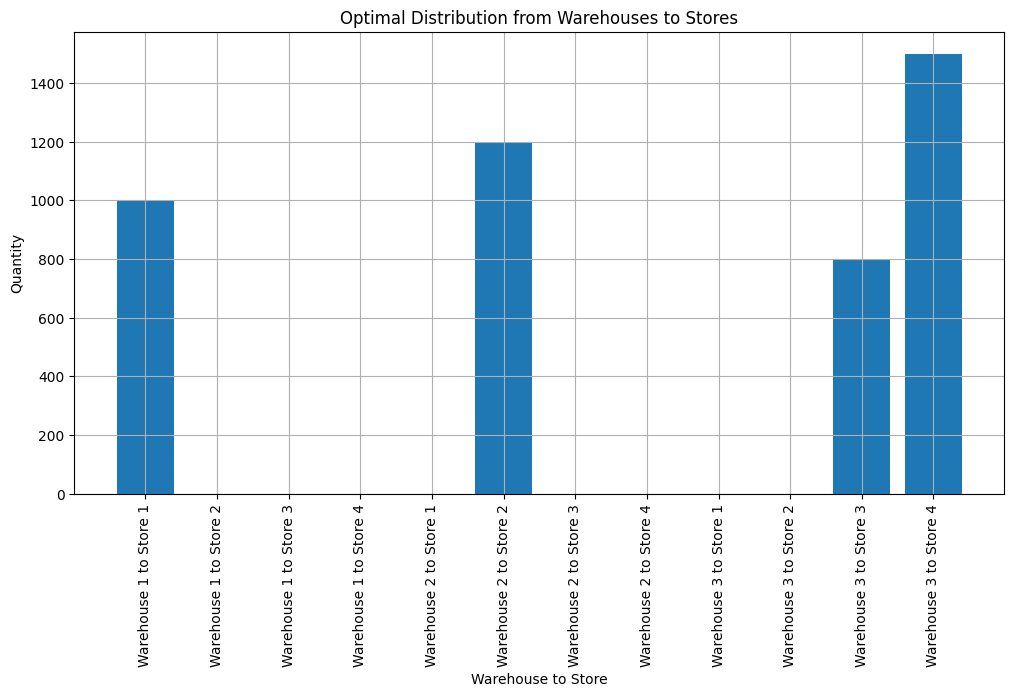

In [18]:
import numpy as np
from scipy.optimize import minimize, linprog
import matplotlib.pyplot as plt

# Define constants
Z = 1.65  # Z-score for a 90% service level

# Example data for warehouse capacities and store demands
warehouses = ['Warehouse 1', 'Warehouse 2', 'Warehouse 3']
stores = ['Store 1', 'Store 2', 'Store 3', 'Store 4']
warehouse_capacities = [5000, 4000, 3000]  # Capacity of each warehouse
store_demands = [1000, 1200, 800, 1500]    # Demand of each store

# Cost matrix (transport cost from each warehouse to each store)
# Rows represent warehouses, columns represent stores
transport_costs = np.array([
    [2, 3, 4, 5],   # Costs from Warehouse 1 to each store
    [3, 2, 5, 4],   # Costs from Warehouse 2 to each store
    [4, 5, 3, 2]    # Costs from Warehouse 3 to each store
])

# Utility functions
def calculate_eoq(demand, ordering_cost, holding_cost):
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_rop(daily_demand, lead_time, safety_stock):
    return (daily_demand * lead_time) + safety_stock

def calculate_safety_stock(daily_demand_std, lead_time, lead_time_std):
    return Z * np.sqrt((lead_time * daily_demand_std**2) + (daily_demand_std**2 * lead_time_std**2))

def calculate_total_cost(demand, ordering_cost, holding_cost, transport_cost, eoq):
    order_cost = (demand / eoq) * ordering_cost
    holding_cost_total = (eoq / 2) * holding_cost
    return order_cost + holding_cost_total + transport_cost

def total_logistics_cost(x, transport_costs):
    return np.dot(x, transport_costs.flatten())

def optimize_distribution():
    num_warehouses = len(warehouses)
    num_stores = len(stores)
    c = transport_costs.flatten()  # Objective function coefficients

    # Constraints
    # 1. Each warehouse has a capacity constraint
    A_ub = []
    b_ub = []
    for i, capacity in enumerate(warehouse_capacities):
        constraint = np.zeros_like(c)
        for j in range(num_stores):
            constraint[i * num_stores + j] = 1
        A_ub.append(constraint)
        b_ub.append(capacity)

    # 2. Each store has a demand constraint
    A_eq = []
    b_eq = []
    for j in range(num_stores):
        constraint = np.zeros_like(c)
        for i in range(num_warehouses):
            constraint[i * num_stores + j] = 1
        A_eq.append(constraint)
        b_eq.append(store_demands[j])

    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)
    A_eq = np.array(A_eq)
    b_eq = np.array(b_eq)

    # Bounds for each variable (number of units to transport should be non-negative)
    x_bounds = [(0, None) for _ in range(len(c))]

    # Solve the linear programming problem
    result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

    if result.success:
        distribution = result.x.reshape(num_warehouses, num_stores)
        return distribution, result.fun
    else:
        print("Optimization failed:", result.message)
        return None, None

def print_results(products, optimal_distribution, total_cost):
    for i, product in enumerate(products):
        demand = product['demand']
        holding_cost = product['holding_cost_rate'] * product['cost']
        eoq = calculate_eoq(demand, product['ordering_cost'], holding_cost)
        daily_demand = demand / 365
        safety_stock = calculate_safety_stock(product['daily_demand_std'], product['lead_time'], product['lead_time_std'])
        rop = calculate_rop(daily_demand, product['lead_time'], safety_stock)
        ail = eoq / 2 + safety_stock

        # Calculate transport costs and total cost
        transport_cost = sum(optimal_distribution[i % len(warehouses), j] * transport_costs[i % len(warehouses), j] for j in range(len(stores)))
        total_cost_for_product = calculate_total_cost(demand, product['ordering_cost'], holding_cost, transport_cost, eoq)

        print(f"Product: {product['name']}")
        print(f"  Optimal Pool: {optimal_distribution[i % len(warehouses), i % len(stores)]:.2f}")
        print(f"  EOQ: {eoq:.2f}")
        print(f"  ROP: {rop:.2f}")
        print(f"  Safety Stock: {safety_stock:.2f}")
        print(f"  AIL: {ail:.2f}")
        print(f"  Total Cost: {total_cost_for_product:.2f}")
        print(f"  Transport Cost: {transport_cost:.2f}")
        print()
    
    print(f"Overall Total Cost: {total_cost:.2f}")

# Define a list of products with example details
products = [
    # Electronics
    {'name': 'Samsung Galaxy S21', 'demand': 1000, 'cost': 69999, 'price': 69999, 'holding_cost_rate': 0.1, 'ordering_cost': 200, 'daily_demand_std': 50, 'lead_time': 10, 'lead_time_std': 2},
    {'name': 'iPhone 12', 'demand': 1500, 'cost': 64900, 'price': 64900, 'holding_cost_rate': 0.1, 'ordering_cost': 180, 'daily_demand_std': 40, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'Vivo V21', 'demand': 800, 'cost': 28999, 'price': 28999, 'holding_cost_rate': 0.1, 'ordering_cost': 150, 'daily_demand_std': 30, 'lead_time': 8, 'lead_time_std': 1.5},
    {'name': 'OnePlus 9', 'demand': 600, 'cost': 49999, 'price': 49999, 'holding_cost_rate': 0.1, 'ordering_cost': 220, 'daily_demand_std': 25, 'lead_time': 9, 'lead_time_std': 2},

    {'name': 'Dell XPS 13', 'demand': 500, 'cost': 129999, 'price': 129999, 'holding_cost_rate': 0.1, 'ordering_cost': 300, 'daily_demand_std': 20, 'lead_time': 15, 'lead_time_std': 4},
    {'name': 'MacBook Air', 'demand': 700, 'cost': 92990, 'price': 92990, 'holding_cost_rate': 0.1, 'ordering_cost': 250, 'daily_demand_std': 25, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'HP Spectre x360', 'demand': 400, 'cost': 114999, 'price': 114999, 'holding_cost_rate': 0.1, 'ordering_cost': 270, 'daily_demand_std': 15, 'lead_time': 14, 'lead_time_std': 3.5},
    {'name': 'Lenovo ThinkPad X1', 'demand': 300, 'cost': 139990, 'price': 139990, 'holding_cost_rate': 0.1, 'ordering_cost': 320, 'daily_demand_std': 18, 'lead_time': 16, 'lead_time_std': 4},

    {'name': 'Canon EOS R5', 'demand': 200, 'cost': 289990, 'price': 289990, 'holding_cost_rate': 0.1, 'ordering_cost': 500, 'daily_demand_std': 10, 'lead_time': 20, 'lead_time_std': 5},
    {'name': 'Nikon Z6', 'demand': 150, 'cost': 189990, 'price': 189990, 'holding_cost_rate': 0.1, 'ordering_cost': 450, 'daily_demand_std': 12, 'lead_time': 18, 'lead_time_std': 4.5},
    {'name': 'Sony Alpha a7 III', 'demand': 180, 'cost': 199990, 'price': 199990, 'holding_cost_rate': 0.1, 'ordering_cost': 480, 'daily_demand_std': 14, 'lead_time': 22, 'lead_time_std': 5.5},
    {'name': 'Fujifilm X-T4', 'demand': 220, 'cost': 169990, 'price': 169990, 'holding_cost_rate': 0.1, 'ordering_cost': 470, 'daily_demand_std': 16, 'lead_time': 21, 'lead_time_std': 5},

    {'name': 'PlayStation 5', 'demand': 350, 'cost': 49990, 'price': 49990, 'holding_cost_rate': 0.1, 'ordering_cost': 300, 'daily_demand_std': 20, 'lead_time': 14, 'lead_time_std': 4},
    {'name': 'Xbox Series X', 'demand': 400, 'cost': 49990, 'price': 49990, 'holding_cost_rate': 0.1, 'ordering_cost': 320, 'daily_demand_std': 25, 'lead_time': 16, 'lead_time_std': 4.5},
    {'name': 'Nintendo Switch', 'demand': 500, 'cost': 29990, 'price': 29990, 'holding_cost_rate': 0.1, 'ordering_cost': 250, 'daily_demand_std': 30, 'lead_time': 12, 'lead_time_std': 3.5},
    {'name': 'Oculus Quest 2', 'demand': 450, 'cost': 29990, 'price': 29990, 'holding_cost_rate': 0.1, 'ordering_cost': 270, 'daily_demand_std': 22, 'lead_time': 15, 'lead_time_std': 4},

    {'name': 'Bose QuietComfort 35 II', 'demand': 300, 'cost': 29990, 'price': 29990, 'holding_cost_rate': 0.1, 'ordering_cost': 200, 'daily_demand_std': 15, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'Sony WH-1000XM4', 'demand': 350, 'cost': 34990, 'price': 34990, 'holding_cost_rate': 0.1, 'ordering_cost': 220, 'daily_demand_std': 20, 'lead_time': 14, 'lead_time_std': 3.5},
    {'name': 'Sennheiser Momentum 3', 'demand': 250, 'cost': 29990, 'price': 29990, 'holding_cost_rate': 0.1, 'ordering_cost': 210, 'daily_demand_std': 12, 'lead_time': 11, 'lead_time_std': 2.5},
    {'name': 'Jabra Elite 85h', 'demand': 200, 'cost': 23990, 'price': 23990, 'holding_cost_rate': 0.1, 'ordering_cost': 190, 'daily_demand_std': 10, 'lead_time': 10, 'lead_time_std': 2},

    {'name': 'Nest Thermostat', 'demand': 150, 'cost': 24990, 'price': 24990, 'holding_cost_rate': 0.1, 'ordering_cost': 150, 'daily_demand_std': 8, 'lead_time': 10, 'lead_time_std': 2},
    {'name': 'Philips Hue Lights', 'demand': 200, 'cost': 19990, 'price': 19990, 'holding_cost_rate': 0.1, 'ordering_cost': 160, 'daily_demand_std': 10, 'lead_time': 12, 'lead_time_std': 3},
    {'name': 'Arlo Pro 3', 'demand': 100, 'cost': 34990, 'price': 34990, 'holding_cost_rate': 0.1, 'ordering_cost': 180, 'daily_demand_std': 7, 'lead_time': 14, 'lead_time_std': 3.5},
    {'name': 'Ring Video Doorbell', 'demand': 120, 'cost': 22990, 'price': 22990, 'holding_cost_rate': 0.1, 'ordering_cost': 170, 'daily_demand_std': 6, 'lead_time': 11, 'lead_time_std': 2.5},
]

# Optimize distribution
optimal_distribution, total_cost = optimize_distribution()

# Print results for each product
print_results(products, optimal_distribution, total_cost)

# Plotting the distribution
plt.figure(figsize=(12, 6))
plt.bar([f"{w} to {s}" for w in warehouses for s in stores], optimal_distribution.flatten())
plt.xlabel('Warehouse to Store')
plt.ylabel('Quantity')
plt.title('Optimal Distribution from Warehouses to Stores')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
